## Уровень 0:

### Задание 1:

Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

In [1]:
import numpy as np
import scipy.stats
import scipy.integrate
import matplotlib.pyplot as plt

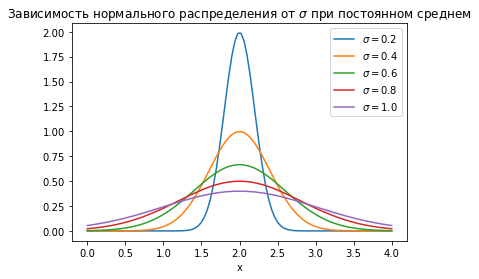

In [2]:
# Среднее значение для нормального распределения
mean = 2

sigma_v = (0.2, 0.4, 0.6, 0.8, 1.0)

pdf_list = []
for sigma in sigma_v:
    norm_rv = scipy.stats.norm(loc=mean, scale=sigma)
    x = np.linspace(0, 4, 100)
    pdf_list.append(norm_rv.pdf(x))

#Строим график функции распределения
plt.plot(x, pdf_list[0], label=f'$\sigma = {sigma_v[0]}$')
plt.plot(x, pdf_list[1], label=f'$\sigma = {sigma_v[1]}$')
plt.plot(x, pdf_list[2], label=f'$\sigma = {sigma_v[2]}$')
plt.plot(x, pdf_list[3], label=f'$\sigma = {sigma_v[3]}$')
plt.plot(x, pdf_list[4], label=f'$\sigma = {sigma_v[4]}$')
plt.xlabel('x')
plt.title(f'Зависимость нормального распределения от $\sigma$ при постоянном среднем')
plt.legend()
plt.show()

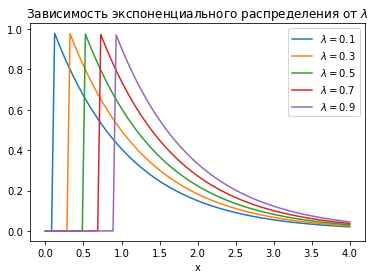

In [3]:
pdf_list = []
lam_v = (0.1, 0.3, 0.5, 0.7, 0.9)

for lam in lam_v:
    x = np.linspace(0, 4, 100)
    pdf_list.append(scipy.stats.expon.pdf(x, loc=lam))

#Строим график функции распределения
plt.plot(x, pdf_list[0], label=f'$\lambda = {lam_v[0]}$')
plt.plot(x, pdf_list[1], label=f'$\lambda = {lam_v[1]}$')
plt.plot(x, pdf_list[2], label=f'$\lambda = {lam_v[2]}$')
plt.plot(x, pdf_list[3], label=f'$\lambda = {lam_v[3]}$')
plt.plot(x, pdf_list[4], label=f'$\lambda = {lam_v[4]}$')
plt.xlabel('x')
plt.title(f'Зависимость экспоненциального распределения от $\lambda$')
plt.legend()
plt.show()

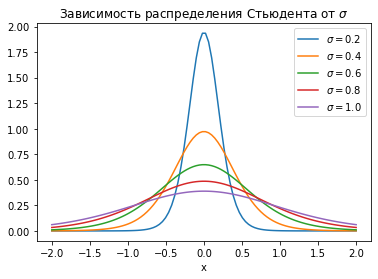

In [4]:
sigma_v = (0.2, 0.4, 0.6, 0.8, 1.0)

pdf_list = []
for sigma in sigma_v:
    x = np.linspace(-2, 2, 100)
    pdf_list.append(scipy.stats.t.pdf(x, 10, scale=sigma))

#Строим график функции распределения
plt.plot(x, pdf_list[0], label=f'$\sigma = {sigma_v[0]}$')
plt.plot(x, pdf_list[1], label=f'$\sigma = {sigma_v[1]}$')
plt.plot(x, pdf_list[2], label=f'$\sigma = {sigma_v[2]}$')
plt.plot(x, pdf_list[3], label=f'$\sigma = {sigma_v[3]}$')
plt.plot(x, pdf_list[4], label=f'$\sigma = {sigma_v[4]}$')
plt.xlabel('x')
plt.title(f'Зависимость распределения Cтьюдента от $\sigma$')
plt.legend()
plt.show()

## Уровень 1:

### Задание 2

Непрерывная случайная величина задана плотностью распределения:
$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$

Найдите C, математическое ожидание $\xi$ а также вероятность попадания в отрезок $[3.5;7]$, т.е. P(3.5 < $\xi$ < 7).

Решение

Так как С - константа, то перед нами равномерное распределение. Коэфициент равномерного распределения найдем по формуле: $1/(b-a) = 1/(5-0) = 1/5$

Функция плотности распределения выглядит следующим образом:

$\begin{equation*}
 \begin{cases}
   1/5, \xi \in [0;5]
   \\
   0, \xi \notin [0;5]
 \end{cases}
\end{equation*}$

Найдем функцию распределения.

Значение функции распределения для промежутка $\xi \in (-\infty;0)$:  
$\int_{-\infty}^{0}0dx = 0$

Значение функции распределения для промежутка $\xi \in [0, 5]$:  
$\int_{-\infty}^{0}0dx + \int_{0}^{x}\frac{1}{5}dx = 0 + \frac{x}{2}|_0^x = \frac{x}{5}$

Значение функции распределения для промежутка $\xi \in (5,+\infty)$:  
$\int_{-\infty}^{0}0dx + \int_{0}^{5}\frac{1}{5}dx + \int_{5}^{+\infty}0dx = 0 + \frac{x}{5}|_0^5 + 0 = 1$

Итоговая функция распределения:

$\begin{equation*}
 \begin{cases}
   0,   \xi \in [-\infty;0)
   \\
   x/5,   \xi \in [0;5]
   \\
   1,   \xi \notin (5;+\infty)
 \end{cases}
\end{equation*}$

Найдем математическое ожидание.

$M(x) = \int_{-\infty}^{0}0*xdx + \int_{0}^{5}\frac{1}{5}xdx + \int_{5}^{+\infty}0*xdx = \frac{x^2}{10}|_0^5 = \frac{1}{10}*(25-0) = 2.5$

Найдем вероятность попадания в отрезок $[3.5;7]$ через функцию распределения:

$P(3.5 < \xi < 7) = F(7) - F(3.5) = 1 - \frac{7}{2*5} = \frac{3}{10} = 0.3$

Найдем вероятность попадания в отрезок $[3.5;7]$ через функцию плотности распределения:

$P(3.5 < \xi < 7) = \int_{3.5}^{5}\frac{1}{5}dx + \int_{5}^{+\infty}0*dx = \frac{x}{5}|_{3.5}^5 + 0 = \frac{1.5}{5} = 0.3$

Теперь проверим наши расчеты через python.

Проверим дейсвтительно ли С = 0.2

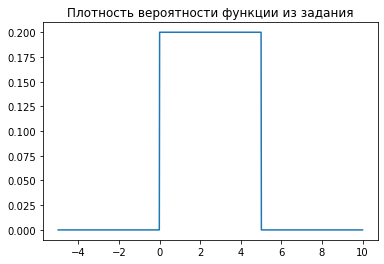

Плотность вероятности имеет максимум в точке 0.2


In [5]:
a = 0
b = 5

uni = scipy.stats.uniform(a, b-a)
x = np.linspace(-5, 10, 1000)
pdf = uni.pdf(x)
plt.plot(x, pdf)
plt.title("Плотность вероятности функции из задания")
plt.show()

if 0.2 == uni.pdf(np.random.uniform(a, b)):
    print('Плотность вероятности имеет максимум в точке 0.2')
else:
    print('Максимум плотности вероятности найден неверно')

Проверим корректность расчета математического ожидания

In [6]:
if 2.5 == scipy.integrate.quad(lambda x: x*1/5, 0, 5)[0]:
    print('Математическое ожидание расчитано верно')
else:
    print('Математическое ожидание расчитано неверно')

Математическое ожидание расчитано верно


Проверим корректность расчета вероятности попадания в отрезок $[3.5;7]$ 

In [7]:
if 0.3 == round(scipy.integrate.quad(lambda x: 1/5, 3.5, 5)[0], 1):
    print('Вероятность попадания в интервал расчитано верно')
else:
    print('Вероятность попадания в интервал расчитано неверно')   

Вероятность попадания в интервал расчитано верно


### Задание 3

Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [8]:
n = 54 + 4 + 28
p_red = 54 / n
p_green = 28 / n
p_yellow = 4 / n

print('Вероятность появления зеленого цвета:', p_green)
print('Вероятность появления желтого цвета:', p_yellow)
print('Вероятность появления красного цвета:', p_red)

assert p_green + p_yellow + p_red == 1, 'Вероятности цветов светофора найдены некорректно'

inf = -(p_green*np.log2(p_green) + p_yellow*np.log2(p_yellow) + p_red*np.log2(p_red))
print('Количество информации сообщения о светофоре в текущий момент:', inf)

Вероятность появления зеленого цвета: 0.32558139534883723
Вероятность появления желтого цвета: 0.046511627906976744
Вероятность появления красного цвета: 0.627906976744186
Количество информации сообщения о светофоре в текущий момент: 1.154522162441165


In [9]:
# В случае одинаковых вероятностей появления каждого цвета можно взять формуду Шенона по количеству равновероятных событий
n = 3
inf = np.log2(n)
print('Количество информации сообщения о светофоре в текущий момент:', inf)

Количество информации сообщения о светофоре в текущий момент: 1.584962500721156
